# Groundwater response to rainfall
by Leah Montgomery

## Introduction
My project is investigating the relationship between precipitation events and grounwater response. It is important to know the lag time between these two events so that we can better understand the recharge processes. I believe that the lag time between a precipitation event and an increase in head will be different depending on the geology of the aquifer. To accomplish this, I will be collecting data for multiple aqiufers in the United 

## Hypothesis
My hypothesis is that the lag time between precipitation and groundwater respose will be different between aquifers of different materials. 

## Research Area
My first research area is in NorthEastern Colorado. I have depth to water data near Muddy Creek and precipitation from a station nearby. 
(include map of the locations here)

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

First I specify the first set of files that I am looking at. Eventually, this will be done for many locations, so instead of specifying parameters I will be looping over a file with all of the data. 

In [2]:
precip_file = 'PrecipitationData_CO.csv'
dtw_file = 'MuddyCreekCO_dtw.txt'
start_date = '2000-04-26'
end_date = '2024-09-17'

Next I read in and clean up the data. In this case, I drop unnecessary columns and look at the top 5 rows. For the depth to water data, they report the minimum, maximum, and mean depths for each day. For Precipitation data, I am keeping the precipitation and snow data. 

In [5]:
p_data = pd.read_csv(precip_file, comment='#', parse_dates=['DATE'], 
                     index_col=['DATE'])
precip = ['PRCP', 'SNOW']
p_data = p_data[precip]

dtw_data = pd.read_csv(dtw_file, comment='#', header=[1], delimiter='\t',
                       parse_dates=['20d'])
dtw_data.rename(columns={'20d':'Date'}, inplace=True)
dtw_data.set_index('Date', inplace=True)
dtw_data.rename(columns={'14n':'Min_dtw', '14n.1':'Max_dtw', '14n.2':"Mean_dtw"}, 
                inplace=True)
columns = ['Min_dtw', 'Max_dtw', 'Mean_dtw']

dtw_data = dtw_data[columns]

p_data = p_data[pd.to_datetime(start_date):pd.to_datetime(end_date)]
dtw_data = dtw_data[pd.to_datetime(start_date):pd.to_datetime(end_date)]

In [6]:
print(p_data.head())
print(dtw_data.head())

            PRCP  SNOW
DATE                  
2000-04-26  0.00   0.0
2000-04-27  0.00   0.0
2000-04-28  0.00   0.0
2000-04-29  0.00   0.0
2000-04-30  0.65   0.0
            Min_dtw  Max_dtw  Mean_dtw
Date                                  
2000-04-26    11.02    11.06     11.04
2000-04-27    11.05    11.06     11.06
2000-04-28    11.00    11.05     11.02
2000-04-29    10.98    11.02     10.99
2000-04-30    11.00    11.06     11.04


Here I am looking at the raw data on a graph to get an idea of what it looks like. I am thinking of eventually putting the precip and depth to water data on the same figure, and having all of the study areas shows in rows. 

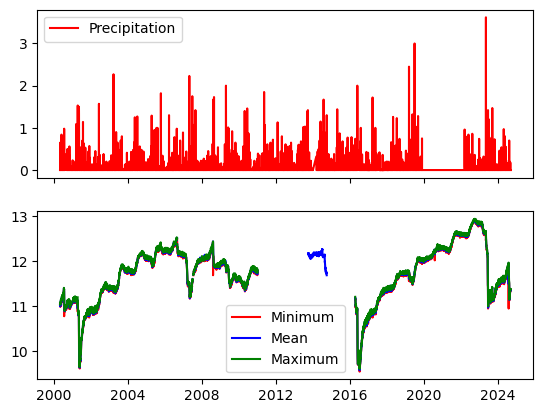

In [8]:
fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=False)

ax1.plot(p_data['PRCP'], 'r-', label='Precipitation')
#ax1.plot(p_data['SNOW'], 'b-', label='Snow')
ax1.legend()

ax2.plot(dtw_data['Min_dtw'], 'r-', label='Minimum')
ax2.plot(dtw_data['Mean_dtw'], 'b-', label='Mean')
ax2.plot(dtw_data['Max_dtw'], 'g-', label='Maximum')
ax2.legend()

plt.show()

## Next steps: 
First, I am going to decide the time period that I want to isolate. This will probably be one year of data. 
Next, I am going to calculate the lag times between the precip events and an increase in groundwater head. 
I want to make a bar chart that has the lag time for each location to compare. 
I will do a cross-correlation (done with numpy) to determine if the precipitation causes the increase I observe. This will result in another plot of the cross-correlations against different lag times. 

## Discussion 

## Conclusion